In [47]:
import requests
import PyPDF2
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Downloading the pdf file
file_url = "https://www.brookings.edu/wp-content/uploads/2020/09/UNESCO-Kim-Care_Africa-ministudy-2020.pdf"

# Get the actual filename from the URL
filename = os.path.basename(file_url)

# Find the position of '.pdf' in the filename and keep only the characters before that position
if '.pdf' in filename:
    filename = filename[:filename.index('.pdf') + 4]

#Create the pdf file locally
r = requests.get(file_url, stream = True)

with open(filename,"wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        '''
        writing one chunk as a time to pdf file
        '''
        if chunk:
            pdf.write(chunk)

# Open PDF file
pdffileObj = open(filename, 'rb')

# Create PDF reader object
pdfReader = PyPDF2.PdfReader(pdffileObj)

# Get the total number of pages in the PDF
num_pages = len(pdfReader.pages)
print("Total number of pages:", num_pages)

# Initialize an empty variable to store the extracted text
all_text = ""

# Loop through each page and extract text
for page_num in range(num_pages):
    # Create a page object for the current page
    pageObj = pdfReader.pages[page_num]
    
    # Extract text from the page
    text = pageObj.extract_text()
    
    # Append the extracted text to the 'all_text' variable
    all_text += text

# Print the combined text from all pages
print("Combined Text:", all_text)

# Close the PDF file object
pdffileObj.close()

Total number of pages: 64
Combined Text: Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030. Education, essential to achieve all of these 
goals, has its own dedicated Goal 4, which aims to “ensure 

In [48]:
all_text.splitlines()
sentiment = all_text.split()
print(sentiment)

['Capturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'United', 'Nations', 'Educational,', 'Scientiﬁc', 'and', 'Cultural', 'Organization', 'Dakar', 'Regional', 'Office', 'Capturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesCapturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'Helyn', 'Kim', 'and', 'Esther', 'CareCapturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesEducation', 'Sector', 'United', 'Nations', '(GXFDWLRQDO\x0f\x036FLHQWL¿F\x03DQG', 'Cultural', 'OrganizationThe', 'Global', 'Education', '2030', 'Agenda', 'UNESCO,', 'as', 'the', 'United', 'Nations’', 'specialized', 'agency', 'for', 'education,', 'is', 'entrusted', 'to', 'lead', 'and', 'coordinate', 'the', 'Education

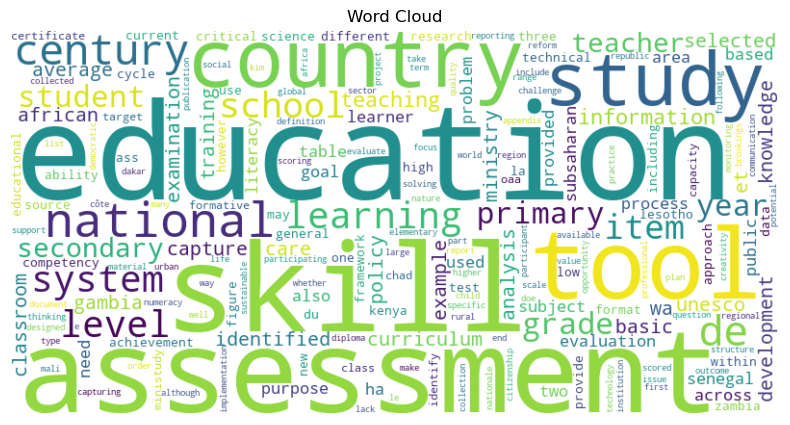

In [49]:
import nltk

#nltk.download('omw-1.4')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample list of words
word_list = sentiment

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Count the occurrence of each relevant word (ignoring capitalization, punctuation, and numbers)
word_counts = {}
for word in word_list:
    # Convert the word to lowercase for case-insensitive comparison
    word = word.lower()

    # Remove punctuation from the word
    word = word.translate(translator)

    # Lemmatize the word to get its base form (singular)
    word = lemmatizer.lemmatize(word)

    # Check if the lowercase word is in the stop words set and if it contains only alphabetic characters
    if word not in stop_words and word.isalpha():
        word_counts[word] = word_counts.get(word, 0) + 1

# Prepare data for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Prepare data for word cloud
wordcloud_data = dict(zip(words, counts))

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [50]:
#Open and Read all Training Data

with open ('trainset/Industry/Accommodation Food Services.txt', "r") as f:
    AccommodationFoodService = f.read().splitlines()

with open ('trainset/Industry/Agriculture Forestry Fishing.txt', "r") as f:
    AgricultureForestryFishing = f.read().splitlines()

with open ('trainset/Industry/Arts Entertainment Recreation.txt', "r") as f:
    ArtsEntertainmentRecreation = f.read().splitlines()

with open ('trainset/Industry/Economywide.txt', "r") as f:
    Economywide = f.read().splitlines()

with open ('trainset/Industry/Educational Services.txt', "r") as f:
    EducationalServices = f.read().splitlines()

with open ('trainset/Industry/Health Care Social Assistance.txt', "r") as f:
    HealthCareSocialAssistance = f.read().splitlines()

with open ('trainset/Industry/Information Finance Insurance.txt', "r") as f:
    InformationFinanceInsurance = f.read().splitlines()

with open ('trainset/Industry/Manufacturing.txt', "r") as f:
    Manufacturing = f.read().splitlines()

with open ('trainset/Industry/Mining Quarrying Oil Gas.txt', "r") as f:
    MiningQuarryingOilGas = f.read().splitlines()

with open ('trainset/Industry/Public Administration.txt', "r") as f:
    PublicAdministration = f.read().splitlines()

with open ('trainset/Industry/Real Estate Rental Leasing.txt', "r") as f:
    RealEstateRentalLeasing = f.read().splitlines()

with open ('trainset/Industry/Technical Management Services.txt', "r") as f:
    TechnicalManagementServices = f.read().splitlines()

with open ('trainset/Industry/Transportation Warehousing.txt', "r") as f:
    TransportationWarehousing = f.read().splitlines()

with open ('trainset/Industry/Utilities Construction.txt', "r") as f:
    UtilitiesConstruction = f.read().splitlines()

with open ('trainset/Industry/WholeSale RetailTrade.txt', "r") as f:
    WholeSaleRetailTrade = f.read().splitlines()


In [51]:
data = {}
data["Accommodation Food Services"] = AccommodationFoodService
data["Agriculture Forestry Fishing"] = AgricultureForestryFishing
data["Arts Entertainment Recreation"] = ArtsEntertainmentRecreation
data["Economywide"] = Economywide
data["Educational Services"] = EducationalServices
data["Health Care Social Assistance"] = HealthCareSocialAssistance
data["Information Finance Insurance"] = InformationFinanceInsurance
data["Manufacturing"] = Manufacturing
data["Mining Quarrying Oil Gas"] = MiningQuarryingOilGas
data["Public Administration"] = PublicAdministration
data["Real Estate Rental Leasing"] = RealEstateRentalLeasing
data["Technical Management Services"] = TechnicalManagementServices
data["Transportation Warehousing"] = TransportationWarehousing
data["Utilities Construction"] = UtilitiesConstruction
data["WholeSale Retail Trade"] = WholeSaleRetailTrade
data

{'Accommodation Food Services': ['Accommodation and food services encompass businesses that provide lodging, dining, and hospitality experiences for travelers and guests.',
  'The accommodation sector includes hotels, resorts, motels, bed and breakfast establishments, vacation rentals, and hostels.',
  'Food services involve restaurants, cafes, food trucks, catering services, and other dining establishments.',
  'Hospitality professionals, including hotel managers, chefs, servers, and concierge staff, play a vital role in delivering exceptional guest experiences.',
  'The lodging industry focuses on providing comfortable accommodations, amenities, and services to travelers and tourists.',
  'Food establishments offer diverse culinary experiences, including international cuisine, local specialties, fine dining, and casual dining options.',
  'Hospitality and tourism are closely intertwined, with accommodation and food services being integral components of the tourism industry.',
  'Even

In [52]:
import spacy
import classy_classification

#Apply Classy Model
nlp = spacy.blank("en")
nlp.add_pipe(
    "text_categorizer", 
    config={
        "data": data, 
        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "device": "cpu"
    }
) 

print(nlp("Industry Classifications")._.cats)

{'Accommodation Food Services': 0.05317914049918832, 'Agriculture Forestry Fishing': 0.07265478993272523, 'Arts Entertainment Recreation': 0.04775442864683798, 'Economywide': 0.08258409314744745, 'Educational Services': 0.020508325975609473, 'Health Care Social Assistance': 0.03681392608591304, 'Information Finance Insurance': 0.08875722305431287, 'Manufacturing': 0.1694789765082499, 'Mining Quarrying Oil Gas': 0.11062620797765103, 'Public Administration': 0.018567770338287857, 'Real Estate Rental Leasing': 0.026348385561093698, 'Technical Management Services': 0.07408580300132629, 'Transportation Warehousing': 0.04808985532835665, 'Utilities Construction': 0.05242087688670146, 'WholeSale Retail Trade': 0.09813019705629826}


In [53]:
sentence_model = spacy.blank("en")
sentence_model.add_pipe("sentencizer")

In [54]:
segment_size = 100000  # Define the desired segment size

num_segments = len(all_text) // segment_size + 1  # Calculate the number of segments

final_data = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment = all_text[start_idx:end_idx]

    sentences = sentence_model(segment)

    for sentence in sentences.sents:
        doc = nlp(sentence.text)
        final_data.append({"sentence": doc.text, "cats": doc._.cats})

In [55]:
#Show Sample score per Sentence
for item in final_data:
    #print (item["sentence"])
    print ("Accommodation Food Services",item["cats"]["Accommodation Food Services"])
    print ("Agriculture Forestry Fishing",item["cats"]["Agriculture Forestry Fishing"])
    print ("Arts Entertainment Recreation",item["cats"]["Arts Entertainment Recreation"])
    print ("Economywide",item["cats"]["Economywide"])
    print ("Educational Services",item["cats"]["Educational Services"])
    print ("Health Care Social Assistance",item["cats"]["Health Care Social Assistance"])
    print ("Information Finance Insurance",item["cats"]["Information Finance Insurance"])
    print ("Manufacturing",item["cats"]["Manufacturing"])
    print ("Mining Quarrying Oil Gas",item["cats"]["Mining Quarrying Oil Gas"])
    print ("Public Administration",item["cats"]["Public Administration"])
    print ("Real Estate Rental Leasing",item["cats"]["Real Estate Rental Leasing"])
    print ("Technical Management Services",item["cats"]["Technical Management Services"])
    print ("Transportation Warehousing",item["cats"]["Transportation Warehousing"])
    print ("Utilities Construction",item["cats"]["Utilities Construction"])
    print ("WholeSale Retail Trade",item["cats"]["WholeSale Retail Trade"])

Accommodation Food Services 0.045859611431798
Agriculture Forestry Fishing 0.08914684057965604
Arts Entertainment Recreation 0.05524577944756142
Economywide 0.037968803022914416
Educational Services 0.19622241858996914
Health Care Social Assistance 0.09005345694276166
Information Finance Insurance 0.03701450519950926
Manufacturing 0.05325782906937146
Mining Quarrying Oil Gas 0.11178794488034409
Public Administration 0.0393862050476963
Real Estate Rental Leasing 0.01909831860743117
Technical Management Services 0.13590999573278184
Transportation Warehousing 0.02739343036249255
Utilities Construction 0.02877026719369995
WholeSale Retail Trade 0.032884593892011704
Accommodation Food Services 0.018003978402627713
Agriculture Forestry Fishing 0.055625899108583815
Arts Entertainment Recreation 0.02348578154482267
Economywide 0.05159832476112665
Educational Services 0.625715993078031
Health Care Social Assistance 0.03489235113027072
Information Finance Insurance 0.02745526892196338
Manufactur

In [56]:
import pandas as pd

# Assuming 'final_data' is a list of dictionaries with keys "sentence" and "cats" for each sentence

# Extract the "sentence" and "cats" data from the final_data list, and trim spaces
sentences = [item["sentence"].strip() for item in final_data]
categories_data = [item["cats"] for item in final_data]

# Create the DataFrame with the "Sentence" column
df_cat = pd.DataFrame({"Sentence": sentences})

# Add the category columns to the DataFrame
category_columns = [
    "Accommodation Food Services",
    "Agriculture Forestry Fishing",
    "Arts Entertainment Recreation",
    "Economywide",
    "Educational Services",
    "Health Care Social Assistance",
    "Information Finance Insurance",
    "Manufacturing",
    "Mining Quarrying Oil Gas",
    "Public Administration",
    "Real Estate Rental Leasing",
    "Technical Management Services",
    "Transportation Warehousing",
    "Utilities Construction",
    "WholeSale Retail Trade"
]

for category in category_columns:
    df_cat[category] = [data[category] for data in categories_data]

# Convert the probability values to percentages and round to two decimal places
#df_cat[category_columns] = (df_cat[category_columns] * 100).round(2).astype(str) + "%"
df_cat[category_columns] = (df_cat[category_columns] * 100).round(6)

# Add a new column with the category_column name that has the highest value
df_cat['Category_Tag'] = df_cat[category_columns].idxmax(axis=1)

# Add a new column for the Filename
df_cat['Filename'] = filename

# Print the final DataFrame
print(df_cat)

# Generate the CSV file path
csv_filename = os.path.join("dataset", "IndustryClassification.csv")

# Create the 'dataset' directory if it doesn't exist
os.makedirs(os.path.dirname(csv_filename), exist_ok=True)

# Check if the CSV file already exists
if os.path.exists(csv_filename):
    # Load the existing CSV file into a DataFrame
    df_existing = pd.read_csv(csv_filename)
    # Assume df_cat is the new DataFrame you want to append
    # Append the new data to the existing DataFrame
    df_combined = pd.concat([df_existing, df_cat], ignore_index=True)
else:
    # If the CSV file doesn't exist, just save the new DataFrame directly
    df_combined = df_cat

# Save the combined DataFrame to the CSV file
df_combined.to_csv(csv_filename, index=False)

                                               Sentence  \
0     Capturing 21st century skills\nAnalysis of ass...   
1     Education, essential to achieve all of these \...   
2     The Education 2030 Framework for Action provid...   
3     UNESCO Education Sector\nEducation is UNESCO’s...   
4     UNESCO is the United Nations’ specialized agen...   
...                                                 ...   
1008                                                 2.   
1009  OAA mini-study – Definition of concepts, UNESC...   
1010  The authors, in collaboration with national re...   
1011  This publication \nis one of the few in the re...   
1012                                                      

      Accommodation Food Services  Agriculture Forestry Fishing  \
0                        4.585961                      8.914684   
1                        1.800398                      5.562590   
2                        2.517015                     10.537402   
3                      

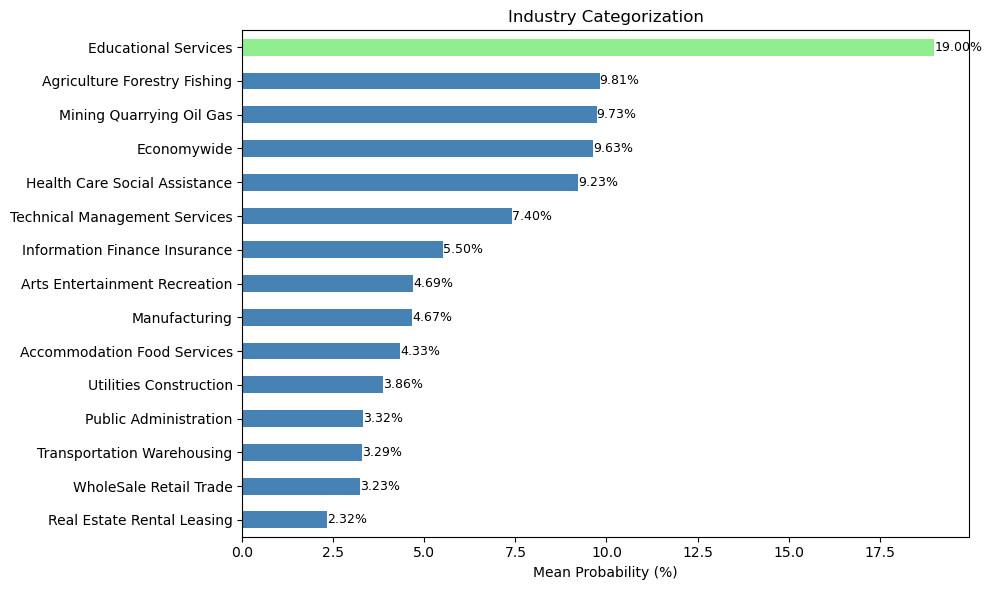

In [57]:
import matplotlib.pyplot as plt

# Calculate the mean probabilities for each category and sort them in descending order
mean_probs = df_cat[category_columns].mean().sort_values(ascending=False)

# Set the color of the highest bar to skyblue and the others to default blue
colors = ['lightgreen' if category == mean_probs.idxmax() else 'steelblue' for category in mean_probs.index]

# Create a horizontal bar chart with data labels
plt.figure(figsize=(10, 6))
mean_probs.plot(kind='barh', color=colors)
plt.title('Industry Categorization')
plt.xlabel('Mean Probability (%)')
#plt.ylabel('Category')
plt.xticks(rotation=0)
for index, value in enumerate(mean_probs):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.tight_layout()
plt.show()